<a href="https://www.kaggle.com/code/madhavigavade/tata-steel-stock-analysis?scriptVersionId=110410100" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## TATA STEEL STOCK ANALYSIS
> Tata Steel Limited is an Indian multinational steel-making company, based in Jamshedpur, Jharkhand and headquartered in Mumbai, Maharashtra. It is a part of the Tata Group.
Formerly known as Tata Iron and Steel Company Limited (TISCO), Tata Steel is among the top steel producing companies in the world with an annual crude steel capacity of 34 million tonnes. It is one of the world's most geographically diversified steel producers, with operations and commercial presence across the world.

## Objectives :
### 1. Info of Five years data, descreptive data
### 2. Stock Splits data
### 3. Visualization of 5 Years stats (OPEN,CLOSE,LOW,HIGH)
### 4. Last 6 months of Volume stats
### 5. Last 1 month stats (HIGH,LOW)
### 6. Resampling of 1 DAY data
### 7. Creating object of ticker
### 8. Financials (EBIT,REvenue)
### 9. Balancesheet of last 4 years
### 10. Cashflow of last 4 years
### 11. Exporting data into csv files.


In [2]:
!pip install yfinance

In [3]:
#importng yfinance libarary
import yfinance as yf

In [4]:
#store the ticker data into ticker
ticker='TATASTEEL.NS'

In [5]:
#Downloading the data from yfinance into ts dataframe
ts=yf.download(ticker,period='5y',actions=True)

[*********************100%***********************]  1 of 1 completed


In [6]:
ts

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2017-11-07,67.634773,67.944412,65.391083,66.043701,26.798691,46784135,0.0,0.0
2017-11-08,66.234253,66.739204,65.171951,66.038940,26.796761,37686385,0.0,0.0
2017-11-09,66.596291,67.172699,66.072289,67.015495,27.193018,26681686,0.0,0.0
2017-11-10,66.748726,67.520447,66.281891,66.905930,27.148558,30366996,0.0,0.0
2017-11-13,67.025024,67.115532,65.462532,65.838867,26.715572,33991271,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-11-01,98.550003,101.449997,98.550003,101.199997,101.199997,69031178,0.0,0.0
2022-11-02,101.000000,103.000000,100.800003,101.250000,101.250000,42336049,0.0,0.0
2022-11-03,100.750000,102.449997,100.000000,102.000000,102.000000,39110676,0.0,0.0


In [7]:
#stats of TATA STEEL stock
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-11-07 to 2022-11-07
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1236 non-null   float64
 1   High          1236 non-null   float64
 2   Low           1236 non-null   float64
 3   Close         1236 non-null   float64
 4   Adj Close     1236 non-null   float64
 5   Volume        1236 non-null   int64  
 6   Dividends     1236 non-null   float64
 7   Stock Splits  1236 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 86.9 KB


In [8]:
#Top five records 
ts.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2017-11-07,67.634773,67.944412,65.391083,66.043701,26.798691,46784135,0.0,0.0
2017-11-08,66.234253,66.739204,65.171951,66.038940,26.796761,37686385,0.0,0.0
2017-11-09,66.596291,67.172699,66.072289,67.015495,27.193018,26681686,0.0,0.0
2017-11-10,66.748726,67.520447,66.281891,66.905930,27.148558,30366996,0.0,0.0
2017-11-13,67.025024,67.115532,65.462532,65.838867,26.715572,33991271,0.0,0.0


In [9]:
#Bottom five records
ts.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-11-01,98.550003,101.449997,98.550003,101.199997,101.199997,69031178,0.0,0.0
2022-11-02,101.000000,103.000000,100.800003,101.250000,101.250000,42336049,0.0,0.0
2022-11-03,100.750000,102.449997,100.000000,102.000000,102.000000,39110676,0.0,0.0
2022-11-04,102.500000,105.000000,102.199997,104.750000,104.750000,70299020,0.0,0.0
2022-11-07,105.900002,107.449997,104.599998,106.699997,106.699997,74426059,0.0,0.0


In [10]:
#Data info about Tata Steel
ts.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03,1236.000000,1236.000000
mean,71.545710,72.641600,70.311647,71.429493,35.217886,1.172611e+08,0.050081,0.008091
std,33.507950,33.939674,32.945414,33.410773,24.123664,7.662590e+07,1.460367,0.284440
min,26.225000,26.795000,25.084999,25.375000,10.753930,4.138710e+06,0.000000,0.000000
25%,46.487500,47.195001,45.693750,46.470001,19.391563,6.608384e+07,0.000000,0.000000
50%,59.072498,60.032501,58.122499,58.957500,24.125180,9.675126e+07,0.000000,0.000000
75%,104.199997,106.357498,102.399998,104.374998,49.869577,1.457575e+08,0.000000,0.000000
max,151.940002,153.449997,149.175003,151.940002,113.000000,6.428460e+08,51.000000,10.000000


In [11]:
#Stock splits info
ts[ts['Stock Splits']>1]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-07-28,98.099998,102.0,97.150002,100.349998,100.349998,137156107,0.0,10.0


## Visualization stats of 5 years
### 1. Open

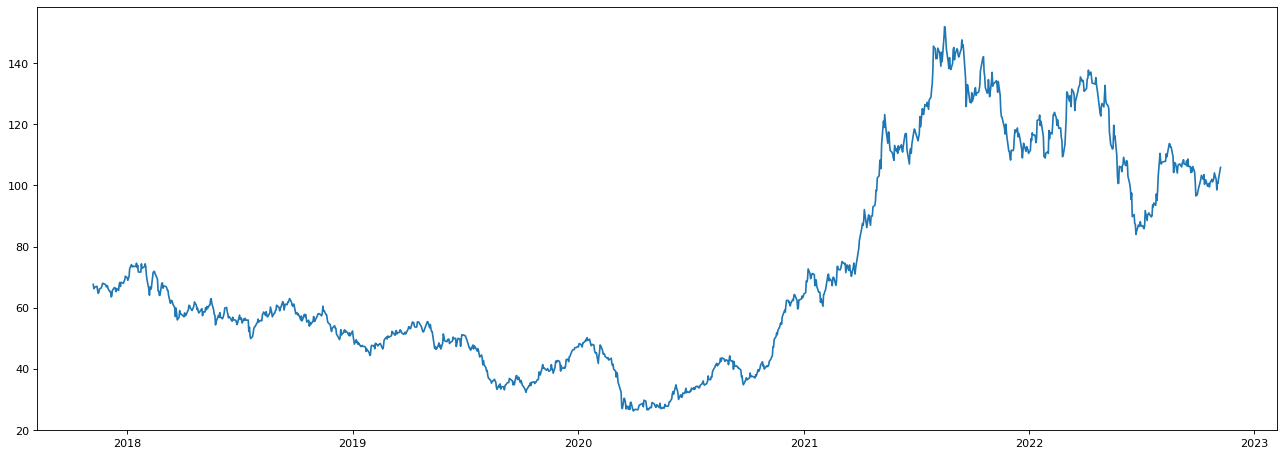

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20,7),dpi=80)
plt.plot(ts.Open)
plt.show()

### 2.Close stats

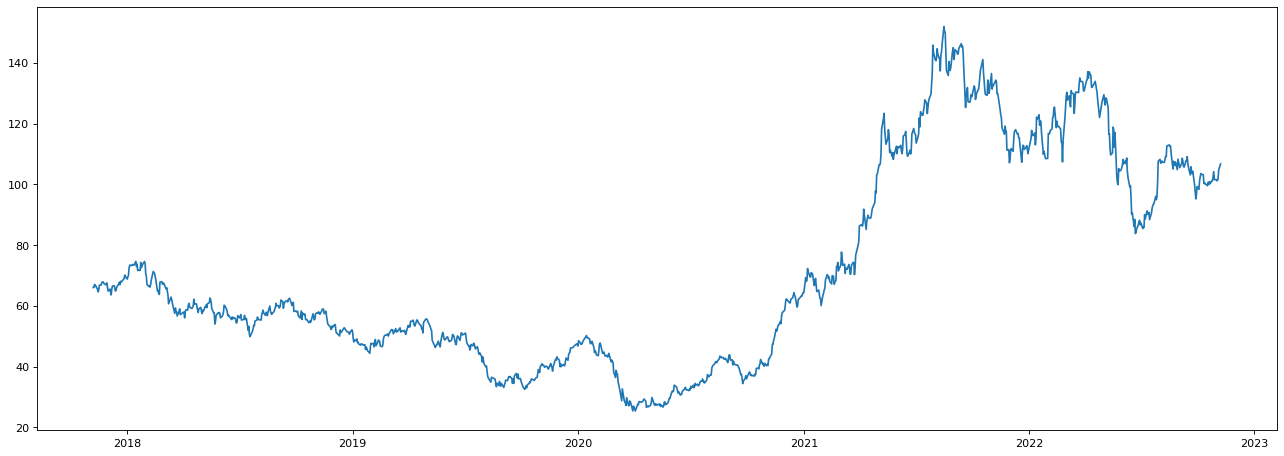

In [13]:
from matplotlib.pyplot import figure
figure(figsize=(20,7),dpi=80)
plt.plot(ts.Close)
plt.show()

### 3.High Stats

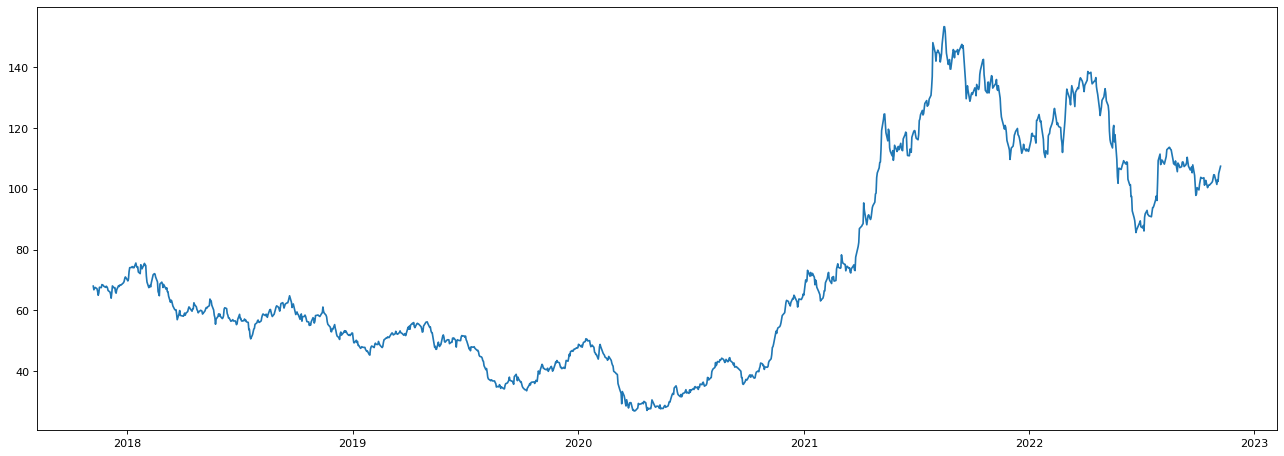

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(20,7),dpi=80)
plt.plot(ts.High)
plt.show()

### 4.Low stats

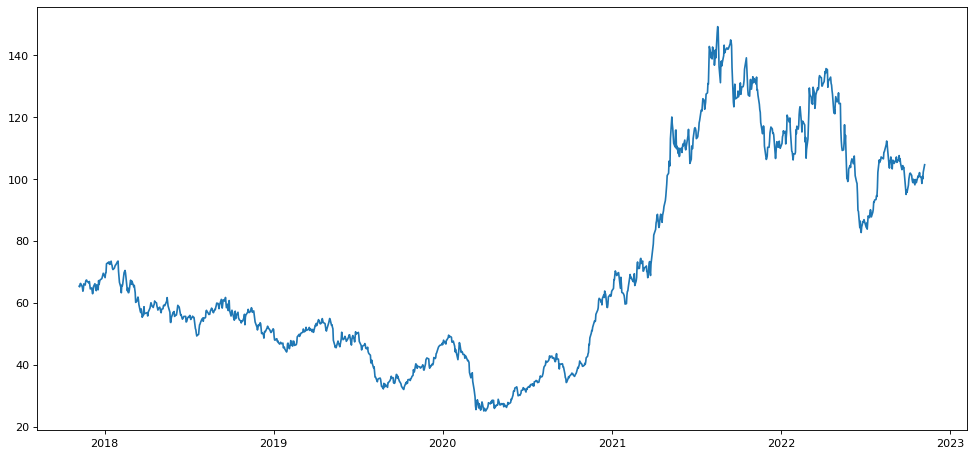

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(15,7),dpi=80)
plt.plot(ts.Low)
plt.show()

### Volume stats of 6 months

[*********************100%***********************]  1 of 1 completed


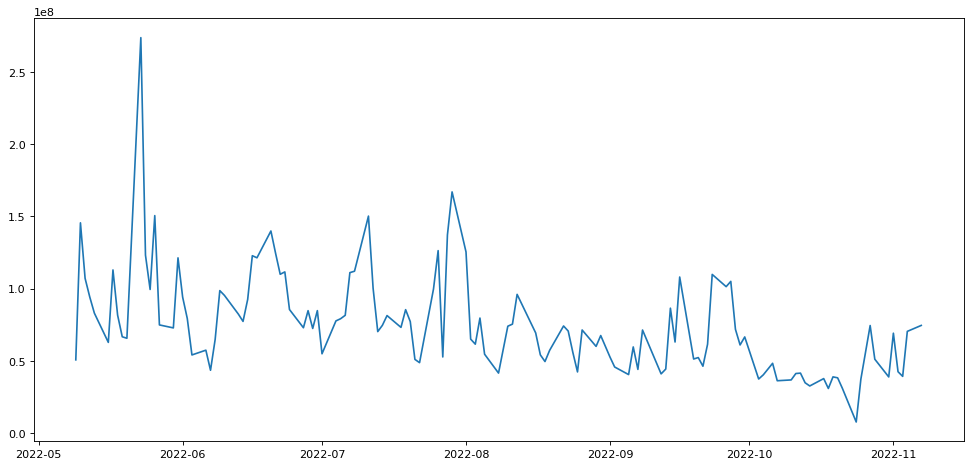

In [16]:
ts=yf.download(ticker,period='6mo')
from matplotlib.pyplot import figure
figure(figsize=(15,7),dpi=80)
plt.plot(ts.Volume)
plt.show()

## Stats of 1 month of TATA STEEL
### High stats

[*********************100%***********************]  1 of 1 completed


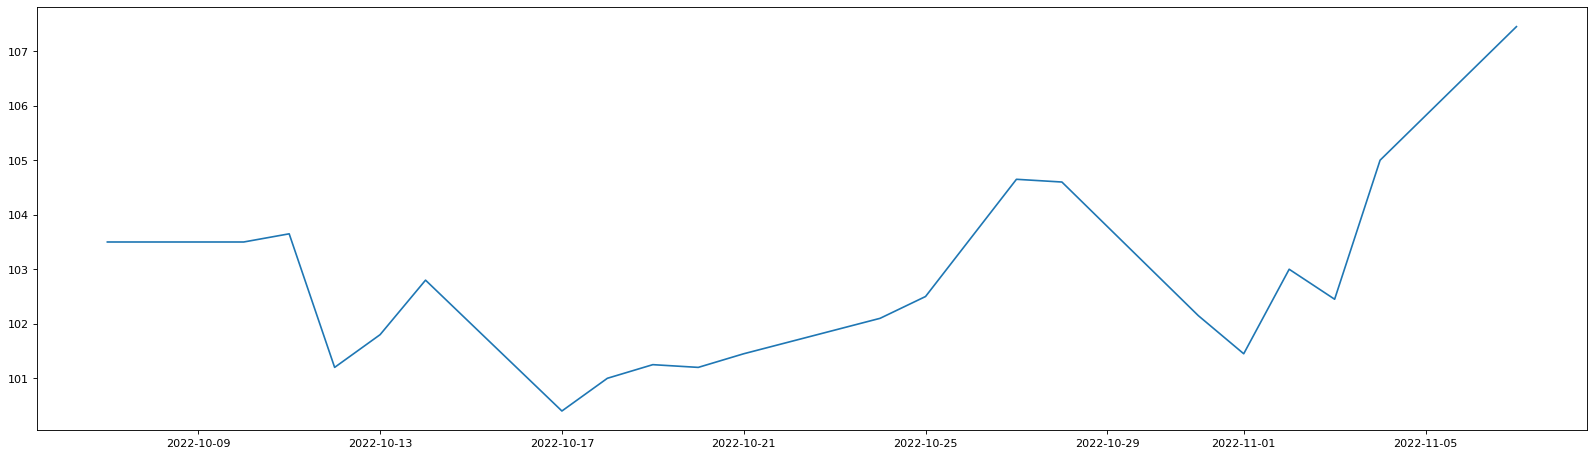

In [17]:
ts=yf.download(ticker,period='1mo',interval='1d')
from matplotlib.pyplot import figure
figure(figsize=(25,7),dpi=80)
plt.plot(ts.High)
plt.show()

## Stats of 1 month of TATA STEEL
### Low stats

[*********************100%***********************]  1 of 1 completed


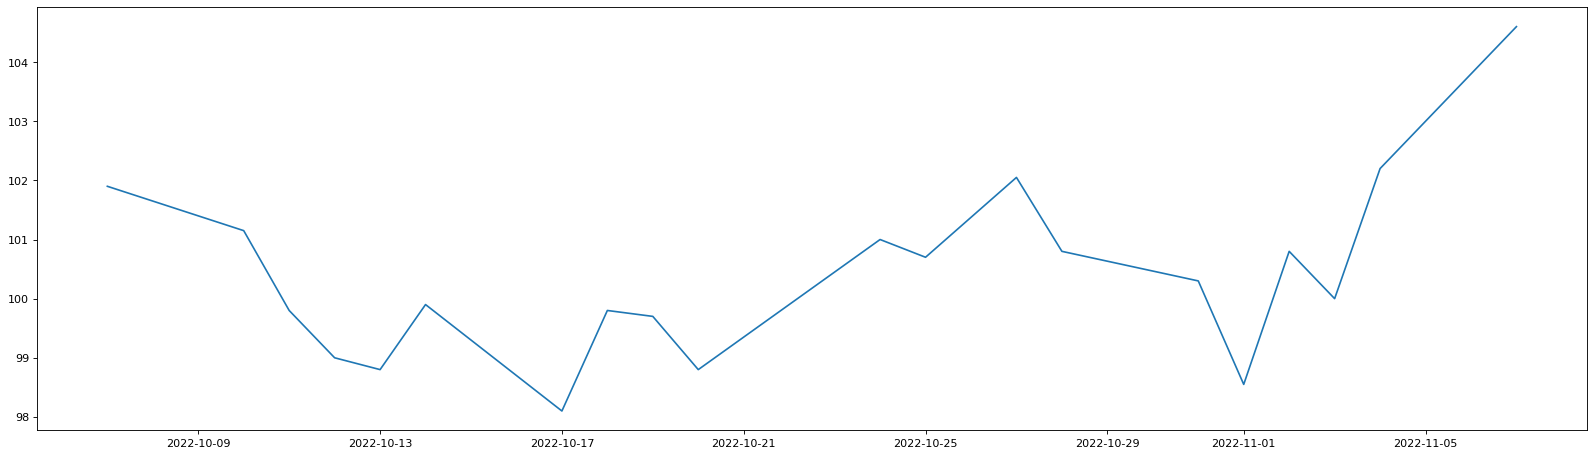

In [18]:
ts=yf.download(ticker,period='1mo',interval='1d')
from matplotlib.pyplot import figure
figure(figsize=(25,7),dpi=80)
plt.plot(ts.Low)
plt.show()

### RESAMPLING THE 1 DAY DATA

[*********************100%***********************]  1 of 1 completed


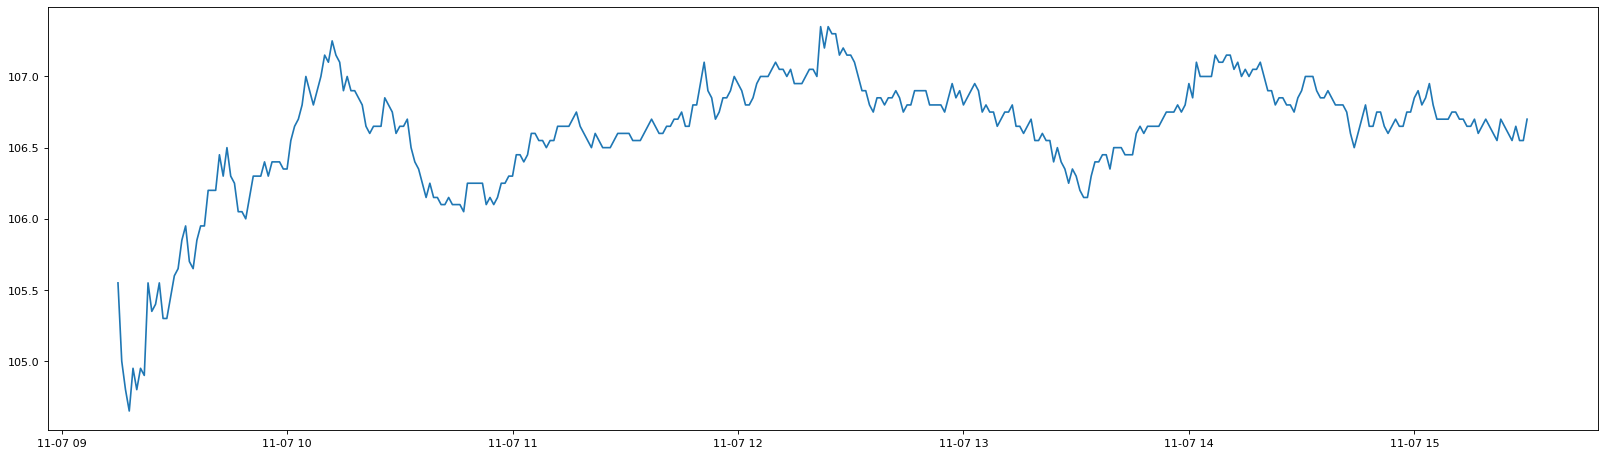

In [19]:
ts=yf.download(ticker,period='1d',interval='1m')
from matplotlib.pyplot import figure
figure(figsize=(25,7),dpi=80)
plt.plot(ts.Close)
plt.show()

## Creating object of ticker 


In [20]:
tatas=yf.Ticker(ticker)
tatas

yfinance.Ticker object <TATASTEEL.NS>

In [21]:
#converting the dictionary into dataframe
df=pd.Series(tatas.info,name='TATASTEEL').to_frame().T
df

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,country,companyOfficers,website,maxAge,...,fiftyTwoWeekLow,bid,tradeable,dividendYield,bidSize,dayHigh,coinMarketCapLink,regularMarketPrice,preMarketPrice,logo_url
TATASTEEL,400001,Basic Materials,65000,Tata Steel Limited manufactures and distribute...,Mumbai,91 22 6665 8282,India,[],https://www.tatasteel.com,1,...,82.7,0,False,0.0487,0,107.45,None,106.7,None,https://logo.clearbit.com/tatasteel.com


## FINANCIALS

In [22]:
#fetching fanancial stats
f=tatas.financials
f

,2022-03-31,2021-03-31,2020-03-31,2019-03-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,502268700000.0,138436900000.0,-13804400000.0,159057200000.0
Minority Interest,26554200000.0,32696800000.0,25866000000.0,23644600000.0
Net Income,401539300000.0,74902200000.0,15565400000.0,102183300000.0
Selling General Administrative,259363600000.0,221573000000.0,215047400000.0,222137800000.0
Gross Profit,1536817200000.0,941029800000.0,805853200000.0,917475500000.0
Ebit,558151900000.0,194943100000.0,83927100000.0,228274000000.0
Operating Income,558151900000.0,194943100000.0,83927100000.0,228274000000.0
Other Operating Expenses,628293000000.0,432177300000.0,419802000000.0,393645400000.0


In [23]:
#creating dictonary 
dat= { 'Year':['march_2022', 'march_2021', 'march_2020', 'march_2019'],
'Ebit' : [502268700000.0,138436900000.0,-13804400000.0,159057200000.0],
'Revenue' : [2439591700000.0, 1564774000000.0, 1489717100000.0, 1576689900000.0] ,
}


,Year,Ebit,Revenue
0,march_2022,5.022687e+11,2.439592e+12
1,march_2021,1.384369e+11,1.564774e+12
2,march_2020,-1.380440e+10,1.489717e+12
3,march_2019,1.590572e+11,1.576690e+12


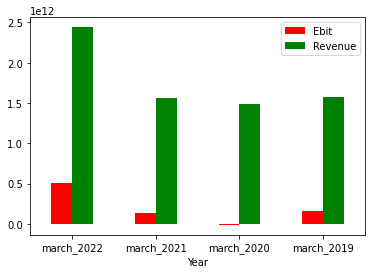

In [24]:
#converting dictionary into dataframe
ax=pd.DataFrame(data=dat)
ax.plot.bar(x='Year',rot=0,color={'Ebit':'red','Revenue': 'Green'})
ax

<AxesSubplot:xlabel='Year'>

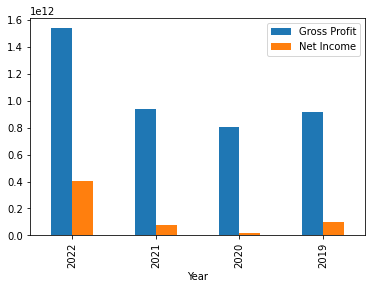

In [25]:
gp= {'Gross Profit': [1536817200000.0, 941029800000.0, 805853200000.0, 917475500000.0] ,
     'Net Income': [401539300000.0, 74902200000.0, 15565400000.0, 102183300000.0],
     'Year':[2022,2021,2020,2019]
             }
ax=pd.DataFrame(data=gp)
ax.plot.bar(x='Year')

### BALANCESHEET

In [26]:
b=tatas.balancesheet
b

,2022-03-31,2021-03-31,2020-03-31,2019-03-31
Intangible Assets,5.290360e+10,3.854590e+10,3.069190e+10,2.654920e+10
Capital Surplus,3.128673e+11,3.096260e+11,2.777812e+11,2.777809e+11
Total Liab,1.683471e+12,1.679788e+12,1.742566e+12,1.622928e+12
Total Stockholder Equity,1.144430e+12,7.423877e+11,7.357630e+11,6.892508e+11
Minority Interest,2.655420e+10,3.269680e+10,2.586600e+10,2.364460e+10
Deferred Long Term Liab,4.000000e+05,1.100000e+06,7.950000e+07,2.410000e+08
Other Current Liab,1.497077e+11,1.857473e+11,1.048290e+11,1.038523e+11
Total Assets,2.854456e+12,2.454872e+12,2.504194e+12,2.335824e+12
Common Stock,1.221010e+10,1.197410e+10,1.144750e+10,1.144740e+10
Other Current Assets,7.260450e+10,4.452050e+10,8.412450e+10,9.607750e+10


### CASHFLOW

In [27]:
c=tatas.cashflow
c

,2022-03-31,2021-03-31,2020-03-31,2019-03-31
Investments,-1.108450e+10,-3.406880e+10,-8.449500e+09,1.348393e+11
Change To Liabilities,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Total Cashflows From Investing Activities,-1.088123e+11,-9.322880e+10,-1.453035e+11,-2.921093e+11
Net Borrowings,-1.523074e+11,-3.066055e+11,7.607310e+10,7.990640e+10
Total Cash From Financing Activities,-2.340109e+11,-3.708967e+11,-1.694620e+10,-6.727000e+09
Change To Operating Activities,7.299130e+10,1.644563e+11,2.634260e+10,3.659220e+10
Issuance Of Stock,3.268600e+09,3.242270e+10,4.000000e+05,4.000000e+05
Net Income,4.015393e+11,7.490220e+10,1.556540e+10,1.021833e+11
Change In Cash,1.007488e+11,-2.200260e+10,4.462040e+10,-4.513200e+10
Repurchase Of Stock,-7.750000e+09,-1.500000e+10,-1.500000e+10,-1.500000e+10


#### EXPORTING DATA INTO CSV FILE

In [28]:
#exporting csv files

c.to_csv("Cashflow_TATASTEEL.csv")
b.to_csv("Balancesheet_Tatasteel.csv")
f.to_csv("Financials_TATASTEEL.csv")
